In [1]:
include("synthetic.jl")
using .Synthetic
using PyPlot
using Seaborn
using LinearAlgebra
using StatsBase
using Gen
using StatsFuns
using Statistics
using TOML
using Glob

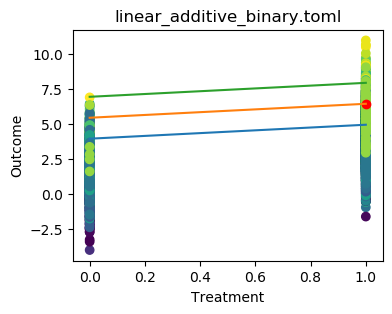

PyObject Text(23.999999999999993, 0.5, 'Outcome')

In [2]:
path = glob("../data/synthetic/*")[1]
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))
subplots(figsize=(4,3))

scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")

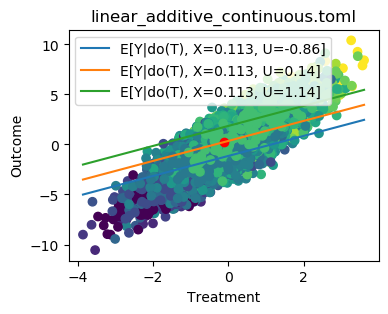

In [3]:
path = glob("../data/synthetic/*")[2]
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))
subplots(figsize=(4,3))

scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

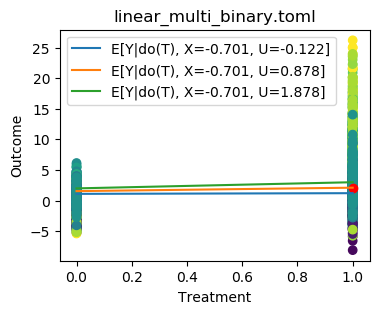

In [4]:
path = glob("../data/synthetic/*")[3]
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))
subplots(figsize=(4,3))

scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

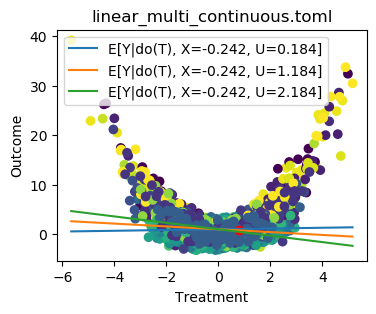

In [5]:
path = glob("../data/synthetic/*")[4]
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))

subplots(figsize=(4,3))
scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

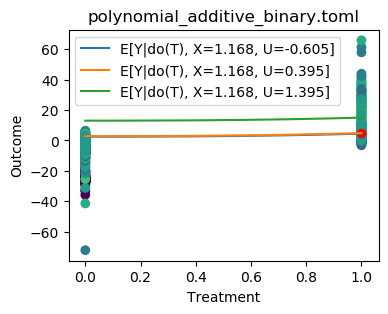

In [6]:
path = glob("../data/synthetic/*")[5]
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))

subplots(figsize=(4,3))
scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

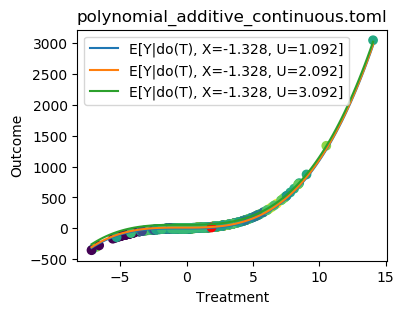

In [7]:
path = glob("../data/synthetic/*")[6]
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))
subplots(figsize=(4,3))

scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

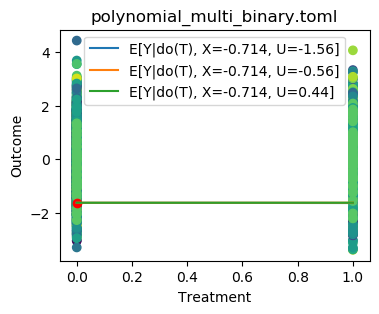

In [8]:
path = glob("../data/synthetic/*")[7]
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))

subplots(figsize=(4,3))
scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

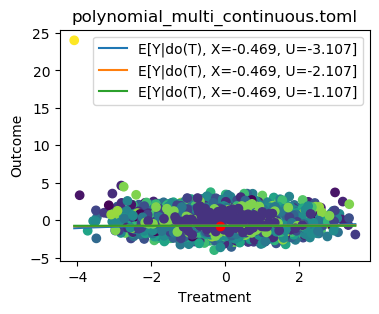

In [9]:
path = glob("../data/synthetic/*")[8]
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))

subplots(figsize=(4,3))
scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

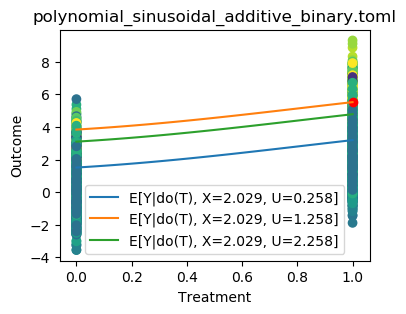

In [10]:
path = glob("../data/synthetic/*")[9]
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))

subplots(figsize=(4,3))
scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

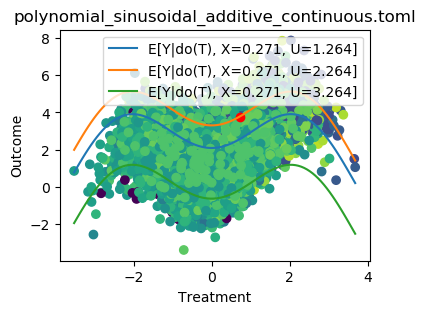

In [11]:
path = glob("../data/synthetic/*")[10]
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))

subplots(figsize=(4,3))
scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

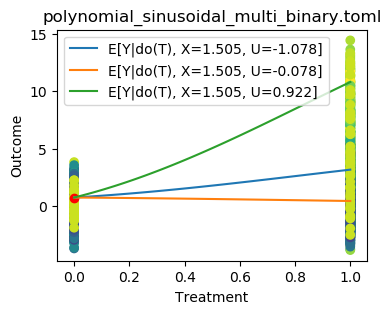

In [12]:
path = glob("../data/synthetic/*")[11]
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))
subplots(figsize=(4,3))

scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()

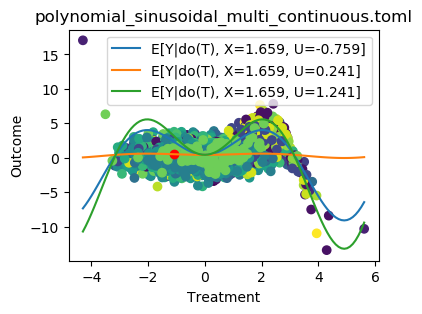

In [13]:
path = glob("../data/synthetic/*")[12]
SigmaU, U, T, X, Y, epsY, ftxu = generate_synthetic(path)
T_ = collect(range(minimum(T),stop=maximum(T),length=100))
ytxu = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1], 100), fill.(epsY[1], 100))
ytxu1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]+1.5, 100), fill.(epsY[1], 100))
ytxu_1 = ftxu(T_, transpose(repeat(X[1, :], 1, 100)), fill.(U[1]-1.5, 100), fill.(epsY[1], 100))

subplots(figsize=(4,3))
scatter(T, Y, c=U)
scatter(T[1], Y[1], c="red")

plot(T_, ytxu_1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]-1, digits=3)) *"]")
plot(T_, ytxu, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1], digits=3)) *"]")
plot(T_, ytxu1, label="E[Y|do(T), X=" * string(round(X[1], digits=3)) * ", U=" * string(round(U[1]+1, digits=3)) *"]")

legend()
title(split(path, "/")[end])
xlabel("Treatment")
ylabel("Outcome")
show()